In [1]:
import numpy as  np 
from matplotlib import pyplot as plt 
%matplotlib inline
import os
from tqdm.notebook import tqdm 
from PIL import Image as im


In [2]:
from matplotlib import rc
from matplotlib.animation import FuncAnimation as animate

rc('animation', html='html5')

# Logistic Regression

Our Hypothesis:

\begin{equation}
\sigma(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
\end{equation}

\begin{equation}
z = ax+by+c
\end{equation}
Final hypothesis:

\begin{equation}
h_\theta(X) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-(ax+by+c)} }
\end{equation}



In [3]:

dataset = []
classes=os.listdir('dataset')
for Class in classes:
    for image in tqdm(os.listdir(f'dataset/{Class}/')):
        dataset.append(f'dataset/{Class}/{image}')
        
trainloader = []

for i in tqdm(dataset):
    image = im.open(i)
    imgarr = np.asarray(image)
    x = np.sum(imgarr)/784 # mean pixel intensity 
    y = np.sum(imgarr-imgarr.T)/784
    label = int(i.split('/')[1])
    trainloader.append([x,y,label])

trainloader = np.array(trainloader)
trainloader.shape


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

(24, 3)

In [4]:
trainloader

array([[45.19515306, 26.44897959,  0.        ],
       [47.13265306, 42.44897959,  0.        ],
       [43.20663265, 35.91836735,  0.        ],
       [48.11607143, 37.87755102,  0.        ],
       [46.56505102, 34.28571429,  0.        ],
       [47.53316327, 33.95918367,  0.        ],
       [58.09056122, 39.83673469,  0.        ],
       [53.43367347, 25.79591837,  0.        ],
       [58.98596939, 46.04081633,  0.        ],
       [31.52040816, 24.81632653,  0.        ],
       [53.91964286, 42.12244898,  0.        ],
       [43.4119898 , 36.89795918,  0.        ],
       [14.82397959, 21.2244898 ,  1.        ],
       [21.14413265, 21.87755102,  1.        ],
       [28.02040816, 37.87755102,  1.        ],
       [21.85586735, 23.83673469,  1.        ],
       [17.46811224, 22.85714286,  1.        ],
       [21.47704082, 24.16326531,  1.        ],
       [22.50765306, 26.44897959,  1.        ],
       [19.40561224, 25.79591837,  1.        ],
       [28.17346939, 32.65306122,  1.   

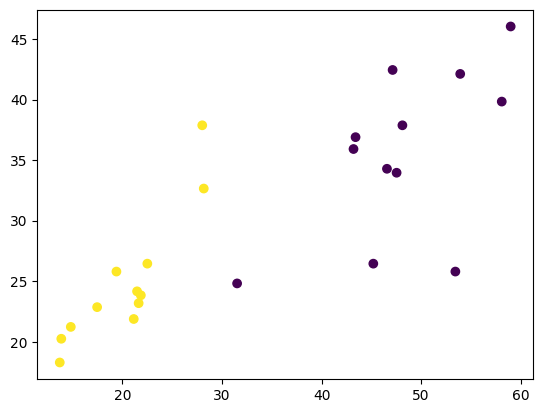

In [5]:
plt.scatter(trainloader[:,0],trainloader[:,1],c=trainloader[:,2])

Loss function for N sample:

\begin{equation}
BCEloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}(-y_i*\log{\hat{y}_i}-(1-y_i)*\log({1-\hat{y}_i}))
\end{equation}


Loss function for single sample:

<!-- \begin{equation}
L(label,pred) = -label*\log({pred})-(1-label)*\log({1-pred})
\end{equation} 
 -->

\begin{equation}
L(label,pred) = -label*\log({\sigma(z)})-(1-label)*\log({1-\sigma(z)})
\end{equation} 



In [6]:
class LogisticRegression:
    def __init__(self,n_features=2) -> None:
        self.weights = np.random.rand(n_features+1,1)

    def forward(self,x):
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        return sigmoid(self.weights.T.dot(x))
    
    def gradients_updation(self,x,Y,lr=0.01):
        x = np.append(x,[1])
        x = x.reshape((len(x),1))
        self.weights -= lr*(self.forward(x)-Y)*x

    @property
    def bias(self):
        return self.weights[-1]
    @property
    def weight(self):
        return self.weights[:-1]


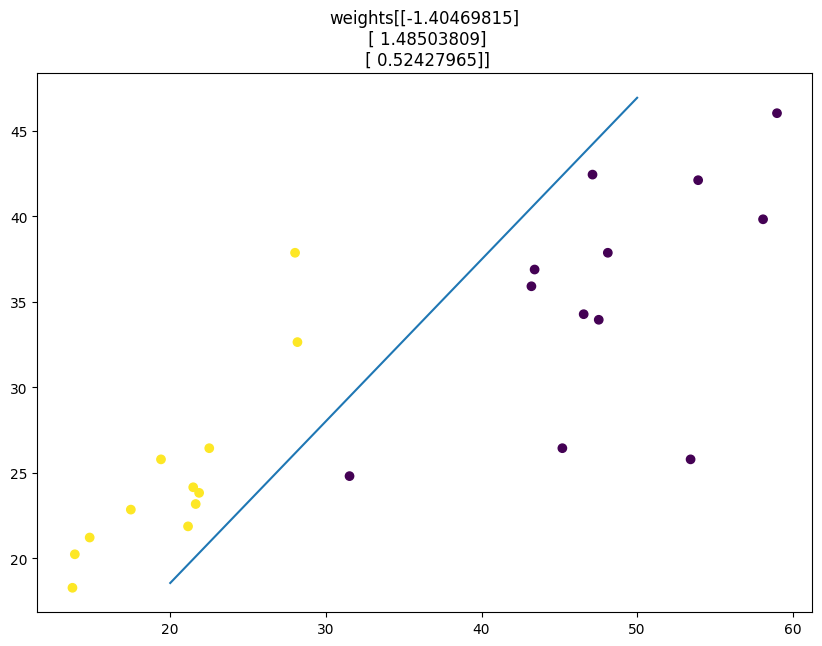

In [7]:
model = LogisticRegression()
fig, ax = plt.subplots(figsize=(10,7))


def train(_):

    f = lambda x:-(model.weight[0].item()*x + model.bias)/model.weight[1]
    x_=np.array([20,50])
    for x,y in zip(trainloader[:,:2],trainloader[:,-1]):
        model.gradients_updation(x,y)

        ax.clear()
        ax.scatter(trainloader[:,0],trainloader[:,1],c=trainloader[:,2])
        ax.plot(x_,f(x_)) # boundary
        plt.title(f'weights{model.weights}')

          

plots1 = animate(fig, train, frames=40, interval=500,repeat=False)
plots1
